**Bernstein-Vazirani Algorithm - Secret string query**

the secret string output from counts will be exactly inverted because of qiskit's qubit ordering which considers the given input bitstring from the rightmost being the topmost qubit in the ordering. this is very easy to reverse order using this code:

```
# for i in range(n-1, -1, -1):
```
but I am retaining the original code so the reader can understand qiskit qubit ordering.


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt

Bernstein-Vazirani Circuit for secret string '100':


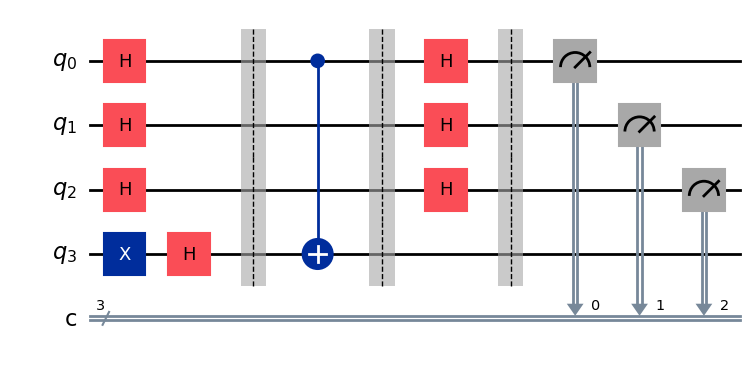


Measurement Results:


Text(0.5, 1.0, 'Bernstein-Vazirani Results for secret 100')

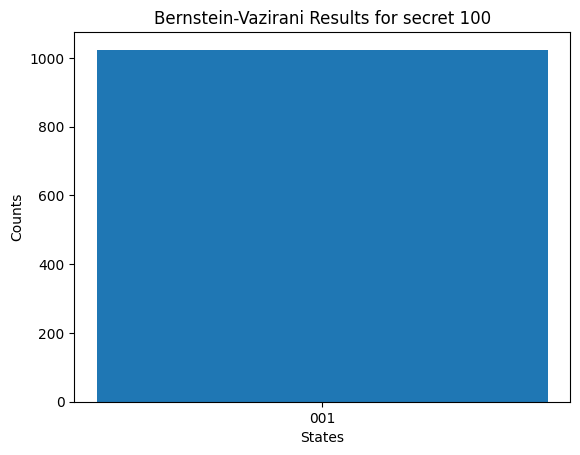

In [3]:
def bv_oracle(secret_string):
    """
    Returns a Bernstein-Vazirani oracle circuit for a given secret string.
    secret_string: str of '0' and '1' (e.g. '1011')
    """
    n = len(secret_string)
    qc = QuantumCircuit(n+1)
    for i, bit in enumerate(secret_string):
        if bit == '1':
            qc.cx(i, n)  # Control on qubit i, target on output qubit
    qc.barrier()
    return qc

def bernstein_vazirani_circuit(secret_string):
    n = len(secret_string)
    qc = QuantumCircuit(n+1, n)
    # Step 1: Initialize output qubit to |1>
    qc.x(n)
    # Step 2: Hadamard on all qubits
    for q in range(n+1):
        qc.h(q)
    qc.barrier()
    # Step 3: Oracle
    qc.compose(bv_oracle(secret_string), inplace=True)
    # Step 4: Hadamard on input qubits
    for q in range(n):
        qc.h(q)
    qc.barrier()
    # Step 5: Measure input qubits
    qc.measure(range(n), range(n))
    return qc

# Example: secret string '10110' (5 bits)
secret = '100'
bv_circuit = bernstein_vazirani_circuit(secret)
print(f"Bernstein-Vazirani Circuit for secret string '{secret}':")
display(bv_circuit.draw('mpl', fold=-1))

# Simulate
simulator = AerSimulator()
compiled = transpile(bv_circuit, simulator)
job = simulator.run(compiled, shots=1024)
counts = job.result().get_counts()

# Plot results
print("\nMeasurement Results:")
plt.bar(counts.keys(), counts.values())
plt.xlabel('States')
plt.ylabel('Counts')
plt.title(f'Bernstein-Vazirani Results for secret {secret}')
